In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

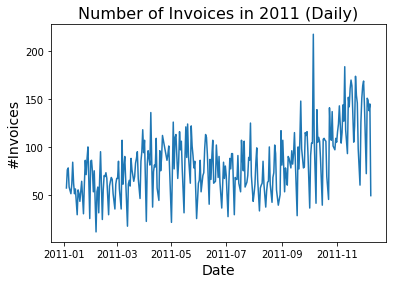

In [8]:
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

#### Số lượng đơn hàng ngày có sự thay đổi mạnh.
#### Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
#### Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

In [9]:
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
d4

,InvoiceDate,InvoiceNo
InvoiceDate,,
1,1476,1476
2,1393,1393
3,1983,1983
4,1744,1744
5,2162,2162
6,2012,2012
7,1927,1927
8,1737,1737
9,2327,2327


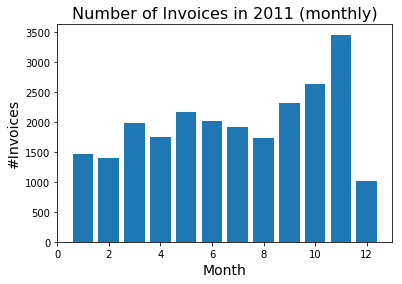

In [10]:
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Number of Invoices in 2011 (monthly)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

### 3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
### Tháng 12 có tổng số lượng đơn hàng thấp nhất.